<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Using_Pytorch_to_fight_cancer_(III).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pytorch to Fight Cancer

## 1. Early Stopping

Early stopping is a widely-used regularization technique in machine learning and deep learning aimed at preventing overfitting during the training process. Here are some key points about early stopping:

1. **Purpose**: The main goal of early stopping is to halt the training of a model once it becomes apparent that the model's performance on a validation set is no longer improving. This helps in ensuring that the model generalizes well to new, unseen data rather than just fitting the training data.

2. **Mechanism**: During training, the model's performance is periodically evaluated on a separate validation dataset. If the validation performance does not improve for a certain number of consecutive epochs (a parameter known as "patience"), the training is stopped. The best weights observed during training are then restored.

3. **Parameters**:
   - **Patience**: This parameter defines the number of epochs to wait for an improvement before stopping. If set to 5, for example, training will stop if there is no improvement in validation performance for 5 epochs.
   - **Minimum Delta**: This parameter sets the minimum change in the monitored metric to qualify as an improvement. This helps to filter out small changes that are not significant.

4. **Benefits**:
   - **Prevents Overfitting**: By stopping early, the model is less likely to fit the noise in the training data, leading to better generalization on unseen data.
   - **Efficiency**: Saves computational resources by not continuing training when improvements are unlikely.
   - **Simplicity**: Easy to implement and does not require modification of the underlying model architecture.

5. **Implementation**: Early stopping is typically implemented using callbacks in deep learning frameworks such as Keras, TensorFlow, and PyTorch. These callbacks monitor the validation metrics and stop training when the criteria are met.

6. **Limitations**: While early stopping is effective, it may not always be the best choice for every model or dataset. For some complex problems, more sophisticated regularization techniques might be required alongside early stopping.

### Resources and Links

Here are some key resources on early stopping:

1. **Towards AI**: This article provides a comprehensive guide on using early stopping, detailing how to implement it in different machine learning models like GradientBoostingClassifier and SGDRegressor, and also in deep learning models using TensorFlow. It explains parameters such as `monitor`, `patience`, `min_delta`, `mode`, and `restore_best_weights` which are crucial for setting up early stopping effectively [Towards AI](https://towardsai.net/p/machine-learning/pause-for-performance-the-guide-to-using-early-stopping-in-ml-and-dl).

2. **Papers with Code**: This page offers a detailed explanation of early stopping, including its role as a regularization method. It provides insights into how early stopping limits the parameter space exploration, ensuring that the model does not overfit the training data [Papers with Code](https://paperswithcode.com/method/early-stopping).

3. **Machine Learning Mastery**: This resource provides practical advice and code examples for implementing early stopping in PyTorch. It highlights the importance of checkpoints and how to resume training from a saved state, which is particularly useful when training complex models that require significant computational resources [Machine Learning Mastery](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping).

These resources offer a blend of theoretical understanding and practical implementation guidance, making them invaluable for anyone looking to incorporate early stopping into their machine learning workflow.


Early stopping is a regularization technique used in training machine learning models, particularly deep neural networks, to prevent overfitting. The method involves monitoring the model's performance on a validation set and halting training when performance stops improving, which helps maintain a balance between underfitting and overfitting.


LET'S GET STARTED!!!!

### Setting our work environment

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.

---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Tue Jun 18 08:28:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [ ]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Mount Google Drive**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create datasets directory

In [ ]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


Change to /datasets and download and unzip dataset

In [ ]:
# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp0.zip'):
  !wget -q https://www.dropbox.com/s/7ir1jixrs1aw55n/exp0.zip
!unzip -qq -o exp0.zip

dataset_dir = /content/datasets


Obtain dirs for  train, test y val sets. Calculate median and standard desviation in order to normalize all images

In [ ]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = "/content/datasets/exp0/train/"
val_dir  = "/content/datasets/exp0/test/"
test_dir   = "/content/datasets/exp0/val/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 2700
Mean: tensor([0.7513, 0.5535, 0.5788])
Std: tensor([0.0921, 0.1196, 0.1349])


Normalize datasets

In [ ]:
# 2. Normalize the training set using these statistics.
train_set = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_set.classes
print('Classes: ', classes)

Length of Train Data :2700
Length of Validation Data : 600
Length of Test Data : 300
Classes:  ['class_0', 'class_1']


Define train process

In [ ]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

Define validation process

In [ ]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects

Load previously weights saved model. We  need the architecture of saved model in order to weights matching with the layers of the model.

In [ ]:
import torch.nn as nn

# Large Model
class myCNN(nn.Module):
    def __init__(self): # defines the constructor method __init__()
                        # for the myCNN class. This method is called
                        # when an instance of the class is created.
        super().__init__() # calls the constructor of the parent class
                           # (nn.Module) using Python's super() function.
                           # It initializes the parent class, allowing the
                           # myCNN class to inherit functionality from nn.Module.

        self.network = nn.Sequential(

            # Layer 1: Conv2d
            # Input: (batch_size, 3, 64, 64)
            # Output: (batch_size, 32, 64, 64)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer 2: Conv2d
            # Input: (batch_size, 32, 64, 64)
            # Output: (batch_size, 64, 64, 64)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            # Input: (batch_size, 64, 64, 64)
            # Output: (batch_size, 64, 32, 32)
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d
            # Input: (batch_size, 64, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 5: Conv2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 16, 16)
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d
            # Input: (batch_size, 128, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 8: Conv2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 8, 8)
            nn.MaxPool2d(2, 2),

            # Layer 10: Flatten
            # Input: (batch_size, 256, 8, 8)
            # Output: (batch_size, 16384)
            nn.Flatten(),

            # Layer 11: Linear
            # Input: (batch_size, 16384)
            # Output: (batch_size, 128)
            nn.Linear(16384, 128),
            nn.ReLU(),

            # Layer 12: Linear
            # Input: (batch_size, 128)
            # Output: (batch_size, 64)
            nn.Linear(128, 64),
            nn.ReLU(),

            # Layer 13: Linear
            # Input: (batch_size, 64)
            # Output: (batch_size, 2)
            nn.Linear(64, 2)
        )
    # The forward method takes a single argument xb,
    # which represents the input data to the neural network.
    # Inside the forward method, the input xb is passed through the
    # neural network layers defined in self.network. The result of this
    # computation is then returned as the output of the forward method.
    def forward(self, xb):
        return self.network(xb)

Interactive with ypour local folder to load the weights

In [ ]:
from google.colab import files

model = files.upload()

Saving myCNN.pth to myCNN.pth


Create a instance (in cuda if it is possible) of our model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Create a instance from your model
model = myCNN().to(device)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)


Using cuda device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear


# Early Stopping

Early stopping is a technique used in machine learning model training to halt training before the model begins to overfit the training data. This is done by monitoring a metric of interest on the validation set and stopping training when the metric ceases to improve for a certain number of consecutive epochs.

You can use the Python standard library os to create a directory named `"train"` in the current directory and then save the trained models (pth) in that directory. Here's an example of how to do it:


To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:

In [ ]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

In [ ]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 20
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")

Number of Classes: 2


In [ ]:
# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

In [ ]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## [Checkpoints and Early Stopping](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping/)

Application checkpointing is a **fault tolerance technique**. In this approach, a *snapshot of the state of the system is taken in case of system failure*. If there is a problem, you can resume from the snapshot. The checkpoint may be used directly or as the starting point for a new run, picking up where it left off. When training deep learning models, the checkpoint captures the weights of the model. These weights can be used to make predictions as-is or as the basis for ongoing training.

PyTorch does not provide any function for checkpointing but it has functions for retrieving and restoring weights of a model. So you can implement checkpointing logic with them. Let’s make a checkpoint and a resume function, which simply save weights from a model and load them back:

In [ ]:
import torch

def checkpoint(model, filename):
  model_path = os.path.join(train_dir, filename)
  torch.save(model.state_dict(), model_path)

def resume(model, filename):
  model.load_state_dict(torch.load(filename))


If you want to add checkpoints to the training loop, you can do it at the end of the outer for-loop, where the model validation with the test set is done.

You will see a number of files created in your working directory. This code is going to checkpoint the model fro each epoch. Each of these file is a ZIP file with the pickled model weight. Nothing forbid you to checkpoint inside the inner for-loop but due to the overhead it incurs, it is not a good idea to checkpoint too frequent.

In [ ]:
from tqdm import tqdm # progress bar
import csv

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir, f"epoch-{epoch+1}.pth"))

# save metrics in a .CSV file.
with open(os.path.join(train_dir,'metrics_myCNN.csv'), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_val_history, accuracy_val_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, val_loss, val_accuracy])


print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train1
Training:


  0%|          | 0/85 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.44it/s, Accuracy=48.9%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.693168 

Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.31it/s, Accuracy=51.0%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.693131 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.51it/s, Accuracy=48.4%, Training_Loss=0.693]


Val: 
 Accuracy: 50.2%, val_Loss: 0.693041 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.33it/s, Accuracy=52.7%, Training_Loss=0.693]


Val: 
 Accuracy: 50.8%, val_Loss: 0.692997 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.69it/s, Accuracy=51.0%, Training_Loss=0.693]


Val: 
 Accuracy: 51.3%, val_Loss: 0.692950 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.84it/s, Accuracy=51.9%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692872 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.50it/s, Accuracy=57.5%, Training_Loss=0.693]


Val: 
 Accuracy: 63.3%, val_Loss: 0.692830 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.57it/s, Accuracy=52.0%, Training_Loss=0.693]


Val: 
 Accuracy: 60.7%, val_Loss: 0.692790 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.69it/s, Accuracy=50.7%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692671 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.62it/s, Accuracy=55.6%, Training_Loss=0.693]


Val: 
 Accuracy: 69.0%, val_Loss: 0.692627 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.21it/s, Accuracy=58.7%, Training_Loss=0.693]


Val: 
 Accuracy: 68.2%, val_Loss: 0.692548 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.55it/s, Accuracy=57.1%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692389 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.20it/s, Accuracy=62.6%, Training_Loss=0.692]


Val: 
 Accuracy: 69.8%, val_Loss: 0.692270 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.72it/s, Accuracy=62.4%, Training_Loss=0.692]


Val: 
 Accuracy: 68.3%, val_Loss: 0.692049 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.65it/s, Accuracy=62.3%, Training_Loss=0.692]


Val: 
 Accuracy: 70.7%, val_Loss: 0.691795 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.59it/s, Accuracy=64.6%, Training_Loss=0.692]


Val: 
 Accuracy: 63.7%, val_Loss: 0.691393 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.41it/s, Accuracy=67.7%, Training_Loss=0.691]


Val: 
 Accuracy: 70.5%, val_Loss: 0.690916 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.61it/s, Accuracy=67.1%, Training_Loss=0.691]


Val: 
 Accuracy: 70.2%, val_Loss: 0.690139 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.81it/s, Accuracy=69.0%, Training_Loss=0.69]


Val: 
 Accuracy: 69.8%, val_Loss: 0.688910 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.58it/s, Accuracy=68.3%, Training_Loss=0.688]


Val: 
 Accuracy: 69.8%, val_Loss: 0.686723 

Done!. Finished Training


The question is of all model which is the best one? It will be studied forward.

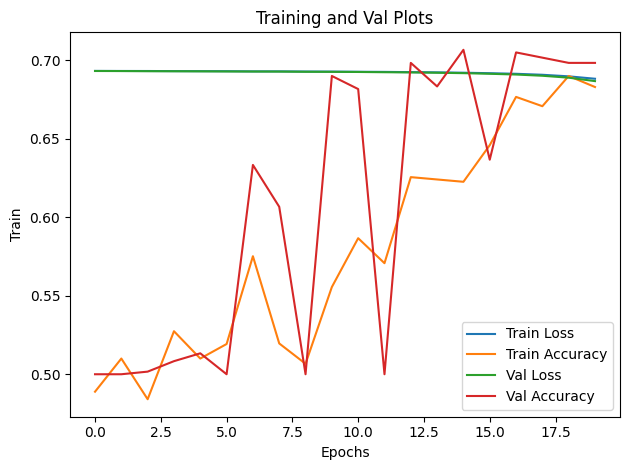

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epochs), loss_train_history, label="Train Loss")
ax.plot(range(epochs), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epochs), loss_val_history, label="Val Loss")
ax.plot(range(epochs), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

You can use a fault tolerance technique where training resumes from a particular epoch. That is, if the training loop was interrupted in the middle of epoch 3 so the last checkpoint is from epoch 2, setting start_epoch = 3 above will do.

This action cannot be simulated in jupyter notebook because we cannot  halt the cell, anyway the code could be this.
```python
epochs = 10

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, f"epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_test_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir, f"epoch-{epoch}.pth"))

# save metrics in a .CSV file.
with open(os.path.join(train_dir,'metrics_myCNN.csv'), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_test_history, accuracy_test_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, val_loss, val_accuracy])

print("Done!. Finished Training")
```



Sometimes, there are states outside of the model and you may want to checkpoint it as well. One particular example is the optimizer, which in cases like SDG or Adam, there are dynamically adjusted momentum. If you restarted your training loop, you may want to restore the momentum at the optimizer as well. It is not difficult to do. The idea is to make your `checkpoint()` function more complicated thanks to `torch.save()` and `torch.load()` function are backed by `pickle`, so you can use it with a list or dict container.

In [ ]:
def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])


In [ ]:
loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"epoch-{resume_epoch}.pth"))

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir,f"epoch-{epoch+1}.pth"))
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train2
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.86it/s, Accuracy=69.0%, Training_Loss=0.685]


Val: 
 Accuracy: 70.5%, val_Loss: 0.682727 

Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.83it/s, Accuracy=70.1%, Training_Loss=0.68]


Val: 
 Accuracy: 70.7%, val_Loss: 0.675249 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.70it/s, Accuracy=70.0%, Training_Loss=0.67]


Val: 
 Accuracy: 71.0%, val_Loss: 0.659989 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.78it/s, Accuracy=70.4%, Training_Loss=0.646]


Val: 
 Accuracy: 71.5%, val_Loss: 0.621181 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.62it/s, Accuracy=69.9%, Training_Loss=0.596]


Val: 
 Accuracy: 71.5%, val_Loss: 0.564485 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.00it/s, Accuracy=70.4%, Training_Loss=0.559]


Val: 
 Accuracy: 71.3%, val_Loss: 0.551382 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.70it/s, Accuracy=71.2%, Training_Loss=0.547]


Val: 
 Accuracy: 72.5%, val_Loss: 0.534912 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.38it/s, Accuracy=72.0%, Training_Loss=0.534]


Val: 
 Accuracy: 72.8%, val_Loss: 0.526102 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.54it/s, Accuracy=72.2%, Training_Loss=0.527]


Val: 
 Accuracy: 72.3%, val_Loss: 0.527215 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.70it/s, Accuracy=72.2%, Training_Loss=0.519]


Val: 
 Accuracy: 73.8%, val_Loss: 0.516896 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.67it/s, Accuracy=72.3%, Training_Loss=0.523]


Val: 
 Accuracy: 73.8%, val_Loss: 0.507731 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.60it/s, Accuracy=72.9%, Training_Loss=0.514]


Val: 
 Accuracy: 74.7%, val_Loss: 0.502398 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.69it/s, Accuracy=72.7%, Training_Loss=0.512]


Val: 
 Accuracy: 72.2%, val_Loss: 0.509167 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.66it/s, Accuracy=73.0%, Training_Loss=0.505]


Val: 
 Accuracy: 74.8%, val_Loss: 0.495682 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.45it/s, Accuracy=73.1%, Training_Loss=0.505]


Val: 
 Accuracy: 72.8%, val_Loss: 0.508394 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.62it/s, Accuracy=73.3%, Training_Loss=0.505]


Val: 
 Accuracy: 71.8%, val_Loss: 0.510681 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.79it/s, Accuracy=73.7%, Training_Loss=0.495]


Val: 
 Accuracy: 75.0%, val_Loss: 0.492786 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.59it/s, Accuracy=74.5%, Training_Loss=0.495]


Val: 
 Accuracy: 74.3%, val_Loss: 0.490111 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.83it/s, Accuracy=74.4%, Training_Loss=0.494]


Val: 
 Accuracy: 73.5%, val_Loss: 0.495172 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.57it/s, Accuracy=75.0%, Training_Loss=0.491]


Val: 
 Accuracy: 75.5%, val_Loss: 0.478138 

Done!. Finished Training


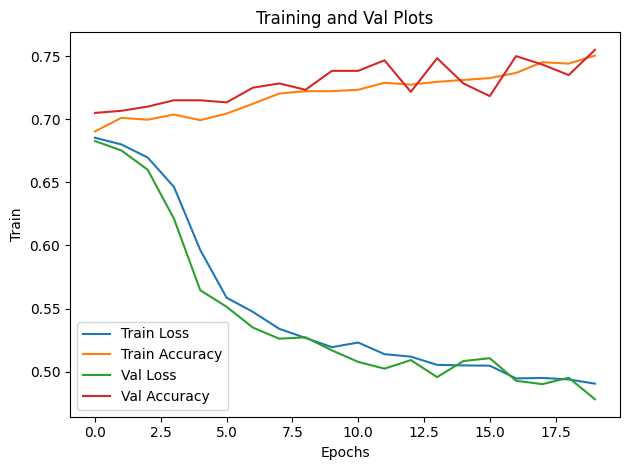

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epochs), loss_train_history, label="Train Loss")
ax.plot(range(epochs), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epochs), loss_val_history, label="Val Loss")
ax.plot(range(epochs), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

Checkpointing is not only for fault tolerance. You can also use it to keep your best model. How to define what is the best is `subjective` but considering the score from the test set is a sensible method. Let’s say to keep only the best model ever found.

The variable `best_accuracy` is to keep track on the highest validation accuracy (`val_acc`) obtained so far, which is in a percentage range of 0 to 100. Whenever a higher accuracy is observed, the model is checkpointed to the file `best_model.pth`. The best model is restored after the entire training loop, via the `resume()` function which was created before.

Afterward, you can make predictions with the model on unseen data. Beware that, if you’re using a different metric for checkpointing, e.g., the cross entropy loss, the better model should come with a lower cross entropy. Thus you should keep track on the lowest cross entropy obtained.


The training loop can be modified as follows:

In [ ]:
best_accuracy = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"epoch-{resume_epoch}.pth"))

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    checkpoint(model, os.path.join(train_dir,f"epoch-{epoch+1}.pth"))
    print(f'best model in epoch:{epoch+1}')
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train3
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.89it/s, Accuracy=74.5%, Training_Loss=0.483]


Val: 
 Accuracy: 73.5%, val_Loss: 0.491004 

best model in epoch:1
Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.58it/s, Accuracy=74.9%, Training_Loss=0.487]


Val: 
 Accuracy: 73.8%, val_Loss: 0.485300 

best model in epoch:2
Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.41it/s, Accuracy=74.4%, Training_Loss=0.483]


Val: 
 Accuracy: 75.3%, val_Loss: 0.469892 

best model in epoch:3
Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.19it/s, Accuracy=74.7%, Training_Loss=0.483]


Val: 
 Accuracy: 75.5%, val_Loss: 0.474191 

best model in epoch:4
Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.73it/s, Accuracy=75.4%, Training_Loss=0.471]


Val: 
 Accuracy: 76.2%, val_Loss: 0.478395 

best model in epoch:5
Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.54it/s, Accuracy=74.9%, Training_Loss=0.477]


Val: 
 Accuracy: 73.0%, val_Loss: 0.506831 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.57it/s, Accuracy=75.3%, Training_Loss=0.478]


Val: 
 Accuracy: 73.2%, val_Loss: 0.477547 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.66it/s, Accuracy=75.3%, Training_Loss=0.471]


Val: 
 Accuracy: 73.8%, val_Loss: 0.489706 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.34it/s, Accuracy=75.4%, Training_Loss=0.468]


Val: 
 Accuracy: 75.0%, val_Loss: 0.478596 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.59it/s, Accuracy=74.9%, Training_Loss=0.471]


Val: 
 Accuracy: 76.0%, val_Loss: 0.476554 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.66it/s, Accuracy=75.6%, Training_Loss=0.478]


Val: 
 Accuracy: 75.5%, val_Loss: 0.462739 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.95it/s, Accuracy=75.5%, Training_Loss=0.464]


Val: 
 Accuracy: 77.3%, val_Loss: 0.465191 

best model in epoch:12
Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.57it/s, Accuracy=76.3%, Training_Loss=0.461]


Val: 
 Accuracy: 75.7%, val_Loss: 0.466857 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.96it/s, Accuracy=75.4%, Training_Loss=0.477]


Val: 
 Accuracy: 75.2%, val_Loss: 0.465184 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.92it/s, Accuracy=76.3%, Training_Loss=0.465]


Val: 
 Accuracy: 78.7%, val_Loss: 0.458831 

best model in epoch:15
Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.81it/s, Accuracy=77.0%, Training_Loss=0.455]


Val: 
 Accuracy: 74.3%, val_Loss: 0.462588 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.86it/s, Accuracy=76.3%, Training_Loss=0.46]


Val: 
 Accuracy: 74.8%, val_Loss: 0.474641 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.88it/s, Accuracy=76.5%, Training_Loss=0.458]


Val: 
 Accuracy: 79.5%, val_Loss: 0.460230 

best model in epoch:18
Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.81it/s, Accuracy=77.3%, Training_Loss=0.453]


Val: 
 Accuracy: 74.8%, val_Loss: 0.451998 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.22it/s, Accuracy=75.7%, Training_Loss=0.465]


Val: 
 Accuracy: 76.3%, val_Loss: 0.458844 

Done!. Finished Training


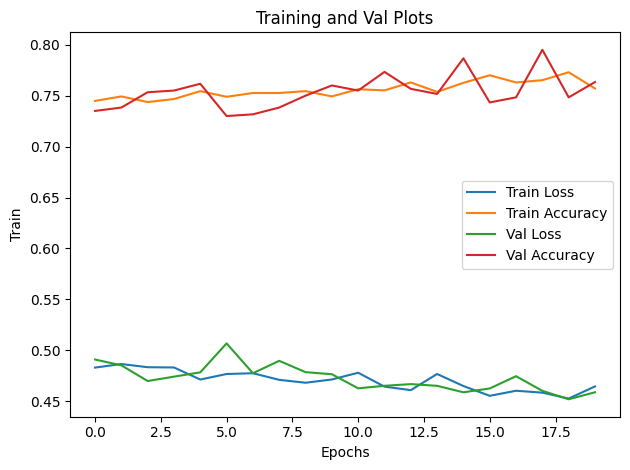

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

You can also checkpoint the model per epoch unconditionally together with the best model checkpointing, as you are free to create multiple checkpoint files. Since the code above is the find the best model and make a copy of it, you may usually see a further optimization to the training loop by stopping it early if the hope to see model improvement is slim. This is the early stopping technique that can save time in training.

The code above validates the model with test set at the end of each epoch and keeps the best model found into a checkpoint file. The simplest strategy for early stopping is to set up a threshold of
 epochs. If you didn’t see the model improved over the last
 epochs, you terminate the training loop in the middle. This can be implemented as follows:

In [ ]:
early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train4
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.08it/s, Accuracy=77.6%, Training_Loss=0.449]


Val: 
 Accuracy: 77.0%, val_Loss: 0.446048 

best model in epoch=1 with Accuracy=76.3%
Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.78it/s, Accuracy=77.6%, Training_Loss=0.449]


Val: 
 Accuracy: 75.3%, val_Loss: 0.481703 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:14<00:00,  5.95it/s, Accuracy=77.5%, Training_Loss=0.444]


Val: 
 Accuracy: 78.0%, val_Loss: 0.450083 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.86it/s, Accuracy=76.9%, Training_Loss=0.452]


Val: 
 Accuracy: 77.8%, val_Loss: 0.451948 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.53it/s, Accuracy=76.7%, Training_Loss=0.465]


Val: 
 Accuracy: 78.0%, val_Loss: 0.457395 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.17it/s, Accuracy=77.4%, Training_Loss=0.447]


Val: 
 Accuracy: 76.3%, val_Loss: 0.454552 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.53it/s, Accuracy=76.6%, Training_Loss=0.451]


Val: 
 Accuracy: 77.2%, val_Loss: 0.456234 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.68it/s, Accuracy=78.5%, Training_Loss=0.442]


Val: 
 Accuracy: 78.7%, val_Loss: 0.444453 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.84it/s, Accuracy=78.6%, Training_Loss=0.444]


Val: 
 Accuracy: 77.8%, val_Loss: 0.447766 

Early stopped training at epoch 9 due to 7 epochs whitout enhacement
Done!. Finished Training


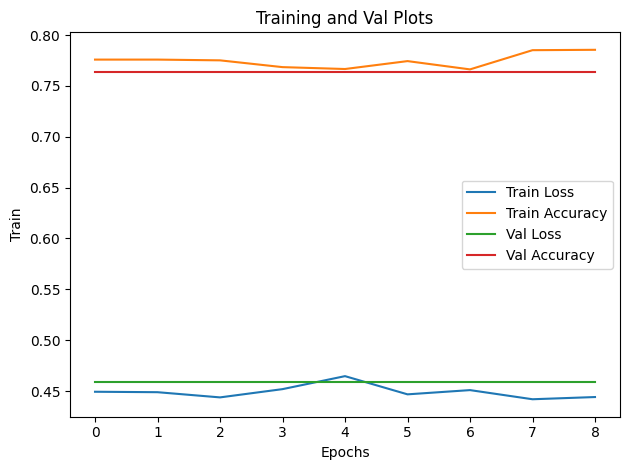

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

In [ ]:
from google.colab import files

files.download(os.path.join(train_dir,f"best_model.pth"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Supongamos que tienes tu modelo entrenado y los conjuntos de datos divididos
val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)


import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Define una función para obtener las predicciones del modelo
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # Si estás utilizando GPU, mueve los datos a la GPU
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define el dispositivo (CPU o GPU) en el que se realizarán las operaciones
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo guardado
model_file = os.path.join(train_dir,f"best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Definir y cargar el modelo
# Asegúrate de definir tu modelo adecuadamente
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Obtén las predicciones del modelo y las etiquetas verdaderas del conjunto de validación
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calcular la matriz de confusión
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Extraer los valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

# Imprimir los valores
print("Verdaderos negativos (TN):", tn)
print("Falsos positivos (FP):", fp)
print("Falsos negativos (FN):", fn)
print("Verdaderos positivos (TP):", tp)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Verdaderos negativos (TN): 197
Falsos positivos (FP): 103
Falsos negativos (FN): 35
Verdaderos positivos (TP): 265


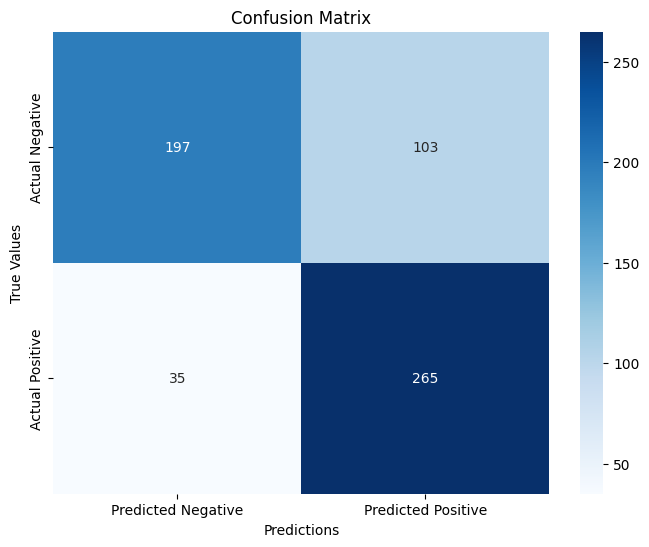

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()